<a href="https://colab.research.google.com/github/MuraliPrasanth706/Fake-news-Detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake/Fake.csv')

fake.head()

fake.columns



Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()


News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

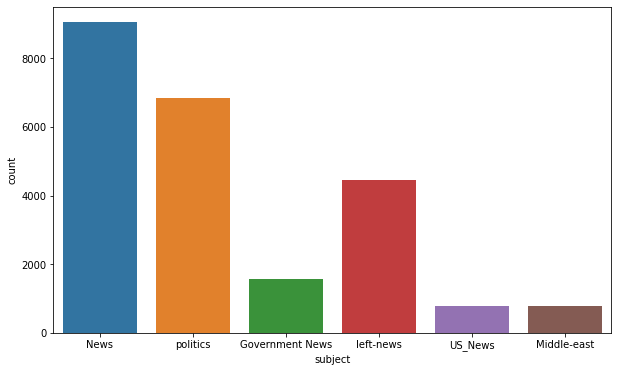

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject',data=fake)

In [ ]:
fake['text']


0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 23481, dtype: object

In [ ]:
text=' '.join(fake['text'].tolist())


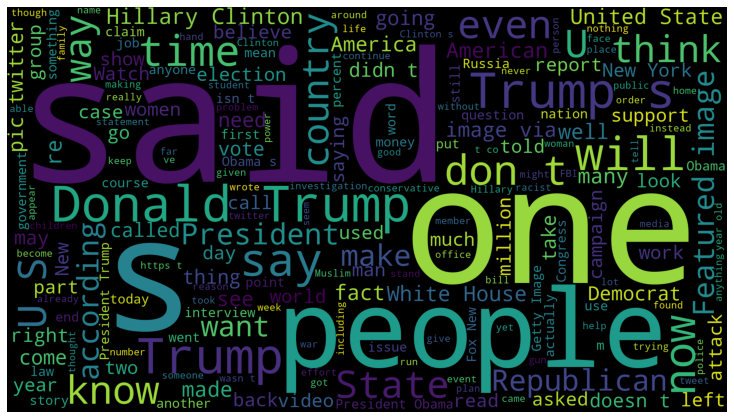

In [ ]:
wordcloud =WordCloud(width = 1920 , height =1080).generate(text)
fig =plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
realnews =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fake/True.csv')

In [ ]:
realnews.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
realnews.columns


Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
text =' '.join(realnews['text'].tolist())


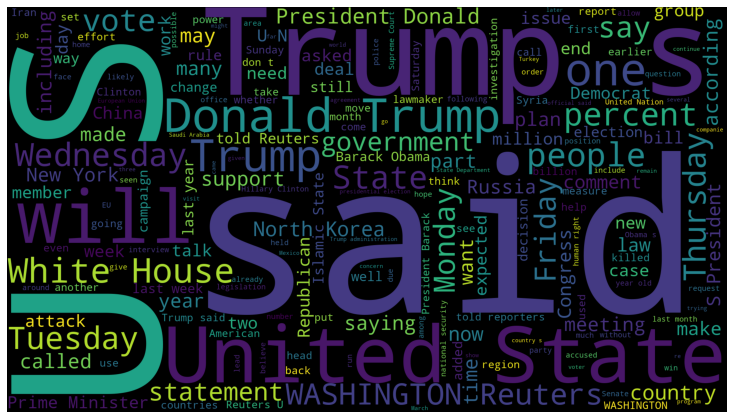

In [ ]:
wordcloud =WordCloud(width = 1920 , height =1080).generate(text)
fig =plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
realnews.sample(5)


unknown_publishers=[]
for index, row in enumerate(realnews.text.values):
  try:
    record =row.split(' - ', maxsplit=1)
    record[1]

    assert(len(record[0])<260)
  except:
    unknown_publishers.append(index)


In [ ]:
len(unknown_publishers)
realnews.iloc[unknown_publishers].text


2922     The following statements were posted to the ve...
3488     The White House on Wednesday disclosed a group...
3782     The following statements were posted to the ve...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5290     The following statements were posted to the ve...
5379     The following statements were posted to the ve...
5412     The following statements were posted to the ve...
5504     The following statements were posted to the ve...
5538     The following statements were posted to the ve...
5588     The following statements were posted to the ve...
5593     The following statements were posted to the ve...
5761     The following bullet points are from the U.S. ...
5784     Federal appeals court judge Neil Gorsuch, the ...
6026     The following bullet points are from the U.S. ...
6184     The following bullet points are from the U.S. ...
6660     Republican members of Congress are complaining.

In [ ]:
realnews.drop(8970 ,axis=0)


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [ ]:
publishers=[]
tmp_text =[]

for index, row in enumerate(realnews.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publishers.append('unknown')
  else:
    record =row.split(' - ',maxsplit=1)
    publishers.append(record[0])
    tmp_text.append(record[1])



realnews['publishers']=publishers
realnews['text']=tmp_text

In [ ]:
realnews.shape
empty_fake_index=[index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]
fake.iloc[empty_fake_index]


,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
realnews['text']=realnews["title"]+" "+ realnews["text"]
fake['text']=fake["title"]+" "+ fake["text"]

realnews['text']=realnews['text'].apply(lambda X: str(X).lower())
fake['text']= fake['text'].apply(lambda X: str(X).lower())


In [ ]:
realnews['class']=1
fake['class']=0

realnews.columns

realnews=realnews[['text','class']]

fake = fake[['text','class']]

data=realnews.append(fake, ignore_index =True)

data.sample(5)

,text,class
29642,starbucks ‘pleased’ that their cafes are now ...,0
17539,allies press catalan leader to declare full in...,1
34757,gold star mom speaks out: “obama used son’s ca...,0
20950,brazil senate to vote on fiscal package on tue...,1
34749,lol! hillary accidentally calls trump her “hus...,0


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 32.2 MB/s 
     |████████████████████████████████| 3.7 MB 52.8 MB/s 
     |████████████████████████████████| 184 kB 71.5 MB/s 
     |████████████████████████████████| 2.2 MB 57.6 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.7.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.2
    Uninstalling thinc-8.1.2:
      Successfully uninstalled thinc-8.1.2
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: s

In [ ]:
import preprocess_kgptalkie as ps

data['text']=data['text'].apply(lambda x : ps.remove_special_chars(x))

data.head()


,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [ ]:
import gensim
y = data['class'].values

In [ ]:
X=[d.split() for d in data['text'].tolist()]
type(X)

list

In [ ]:
DIM =100
w2v_model =gensim.models.Word2Vec(sentences=X ,size=DIM,window=10 ,min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

w2v_model.wv.most_similar('us')

[('american', 0.5879820585250854),
 ('reformswe', 0.4986784756183624),
 ('iranian', 0.48908212780952454),
 ('washingtons', 0.4683806896209717),
 ('iran', 0.4680640995502472),
 ('russian', 0.46464186906814575),
 ('nato', 0.4618165194988251),
 ('pakistan', 0.4534343183040619),
 ('refugeesjohn', 0.44836968183517456),
 ('countrys', 0.4469749331474304)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)   

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])




1580

In [ ]:
maxlen =1000
X =pad_sequences(X, maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index


def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size , DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix




embedding_vectors= get_weight_matrix(w2v_model)
embedding_vectors.shape


(231836, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size,output_dim = DIM , weights = [embedding_vectors], input_length =maxlen ,trainable =False))
model.add(LSTM(units=128))
model.add(Dense(1,activation ='sigmoid'))
model.compile(optimizer = 'adam', loss='binary_crossentropy',metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23183600  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,300,977
Trainable params: 117,377
Non-trainable params: 23,183,600
_________________________________________________________________


In [ ]:
X_train, X_test, y_train , y_test =train_test_split(X,y)
model.fit(X_train,y_train , validation_split=0.3 , epochs=6)


Epoch 1/6
737/737 [==============================] - 48s 56ms/step - loss: 0.1508 - acc: 0.9424 - val_loss: 0.0981 - val_acc: 0.9681
Epoch 2/6
737/737 [==============================] - 41s 56ms/step - loss: 0.0645 - acc: 0.9786 - val_loss: 0.1083 - val_acc: 0.9608
Epoch 3/6
737/737 [==============================] - 38s 52ms/step - loss: 0.0649 - acc: 0.9764 - val_loss: 0.0610 - val_acc: 0.9795
Epoch 4/6
737/737 [==============================] - 43s 59ms/step - loss: 0.0256 - acc: 0.9915 - val_loss: 0.0451 - val_acc: 0.9874
Epoch 5/6
737/737 [==============================] - 41s 56ms/step - loss: 0.0171 - acc: 0.9945 - val_loss: 0.0299 - val_acc: 0.9903
Epoch 6/6
737/737 [==============================] - 42s 57ms/step - loss: 0.0117 - acc: 0.9969 - val_loss: 0.0343 - val_acc: 0.9906


In [ ]:
y_pred = (model.predict(X_test)>=0.5).astype(int)
accuracy_score(y_test,y_pred)


0.9899331848552338

In [ ]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5852
           1       0.99      0.99      0.99      5373

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x=['this is a news']


In [ ]:
X_test

array([[  65, 6667,  152, ...,    9,   40,  571],
       [   0,    0,    0, ...,   17,    6, 3934],
       [   0,    0,    0, ...,  359,    1,  212],
       ...,
       [   0,    0,    0, ...,    4,  252,  453],
       [   0,    0,    0, ...,  154,    1, 2059],
       [   0,    0,    0, ...,  112, 1287, 1378]], dtype=int32)

In [ ]:
x=['this is a news']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x)>=0.5).astype(int)

array([[0]])

In [ ]:
x=["Thalapathy Vijay accepted Mahesh Babu's  Green India challenge which he initiated on his birthday."]
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x, maxlen=maxlen)

In [ ]:

(model.predict(x)>=0.5).astype(int)

array([[1]])